# Visualizing Mental health data
<p>This dataset offers significant insights for decision-making related to research grants, policy formation, and developing preventative intervention plans across national borders. This broadens our current knowledge of mental health disorders!</p>

In [ ]:
# Load medical data src=https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/data/prevalence.csv")


In [ ]:
data.dtypes

index                          int64
Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [ ]:
print(data.isnull().sum())

index                          0
Entity                         0
Code                         980
Year                           0
Schizophrenia (%)              0
Bipolar disorder (%)           0
Eating disorders (%)           0
Anxiety disorders (%)          0
Drug use disorders (%)         0
Depression (%)                 0
Alcohol use disorders (%)      0
dtype: int64


In [ ]:
#data.fillna(0, inplace=True)

In [ ]:
data.tail(3)

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


In [ ]:
data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

<ipython-input-94-cc4d768ce8b8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
<ipython-input-94-cc4d768ce8b8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
country = ['United States', 'United Arab Emirates', 'Tanzania', 'Switzerland', 'Greece', 'Argentina', 'Dominica', 'East Asia']

In [ ]:
# Extract the column names representing disorders from the DataFrame
disorders = [col for col in data.columns if col.endswith('%')]


In [ ]:
data[disorders] = data[disorders].astype(float)

In [ ]:
# Filter the dataset to include only the selected countries
filtered_data = data[data['Entity'].isin(country)][['Entity', 'Year'] + disorders]


In [ ]:
# Transpose the data for easier plotting
filtered_data = filtered_data.melt(id_vars=['Entity', 'Year'], value_vars=disorders, var_name='Disorder', value_name='Prevalence')

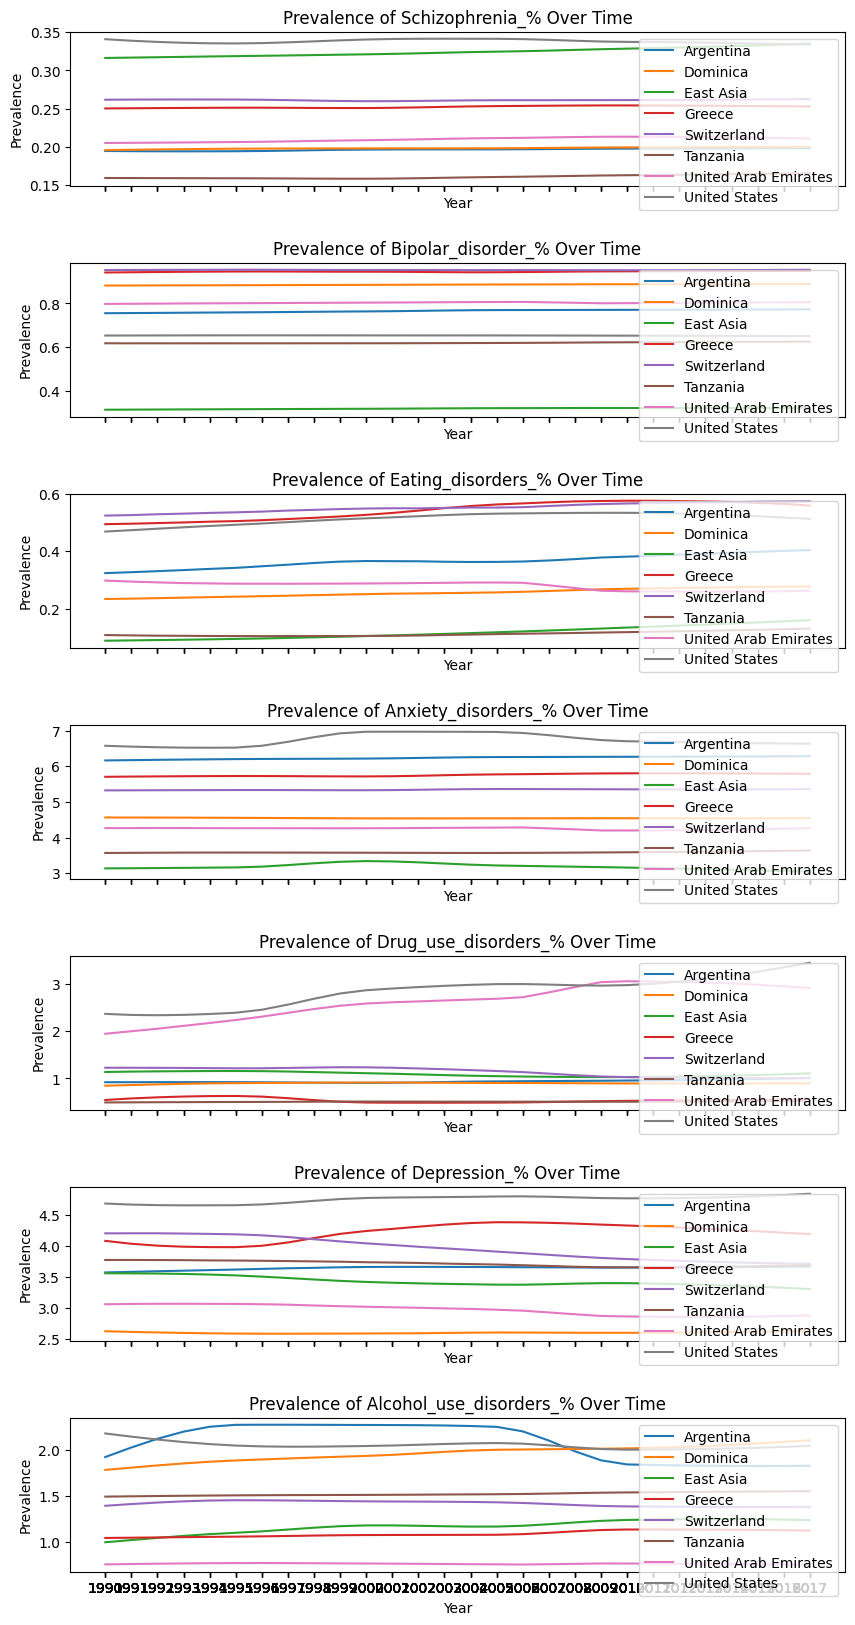

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each disorder
fig, axes = plt.subplots(len(disorders), 1, figsize=(10, 20), sharex=True)
plt.subplots_adjust(hspace=0.5)

for i, disorder in enumerate(disorders):
    ax = axes[i]
    ax.set_title(f'Prevalence of {disorder} Over Time')
    disorder_data = filtered_data[filtered_data['Disorder'] == disorder]
    for country, group_data in disorder_data.groupby('Entity'):
        ax.plot(group_data['Year'], group_data['Prevalence'], label=country)
    ax.legend(loc='upper right')
    ax.set_xlabel('Year')
    ax.set_ylabel('Prevalence')
    ax.set_xticks(disorder_data['Year'])

# Show the plot
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/male_female.csv")
df.tail(5)

,6468+F36A1:F50F1A1:E37A1:E37,Entity,Code,Year,Prevalence_in_males,Prevalence_in females,Population
95610,102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000
95611,102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000
95612,102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000
95613,102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000
95614,102083,Zimbabwe,ZWE,2019,NaN,NaN,14645000


In [ ]:
filtered_data = df.dropna(subset=['Prevalence_in_males', 'Prevalence_in females', 'Code', 'Population'])

In [ ]:
# Prevalence of both males and females in USA
US_data = df[df['Code'] == 'USA']
US_data['Year'] = pd.to_numeric(US_data['Year'], errors='coerce')
US_data['Prevalence_in_males'] = pd.to_numeric(US_data['Prevalence_in_males'], errors='coerce')
US_data['Prevalence_in females'] = pd.to_numeric(US_data['Prevalence_in females'], errors='coerce')
US_data = US_data.dropna(subset=['Year'])
US_data.head(5)


<ipython-input-163-560296b8f8f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['Year'] = pd.to_numeric(US_data['Year'], errors='coerce')
<ipython-input-163-560296b8f8f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['Prevalence_in_males'] = pd.to_numeric(US_data['Prevalence_in_males'], errors='coerce')
<ipython-input-163-560296b8f8f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,6468+F36A1:F50F1A1:E37A1:E37,Entity,Code,Year,Prevalence_in_males,Prevalence_in females,Population
45162,51631,United States,USA,1800,NaN,NaN,6801854
45163,51632,United States,USA,1801,NaN,NaN,6933517
45164,51633,United States,USA,1802,NaN,NaN,7067728
45165,51634,United States,USA,1803,NaN,NaN,7204538
45166,51635,United States,USA,1804,NaN,NaN,7343995


In [ ]:
US_data = US_data.dropna(subset=['Year'])

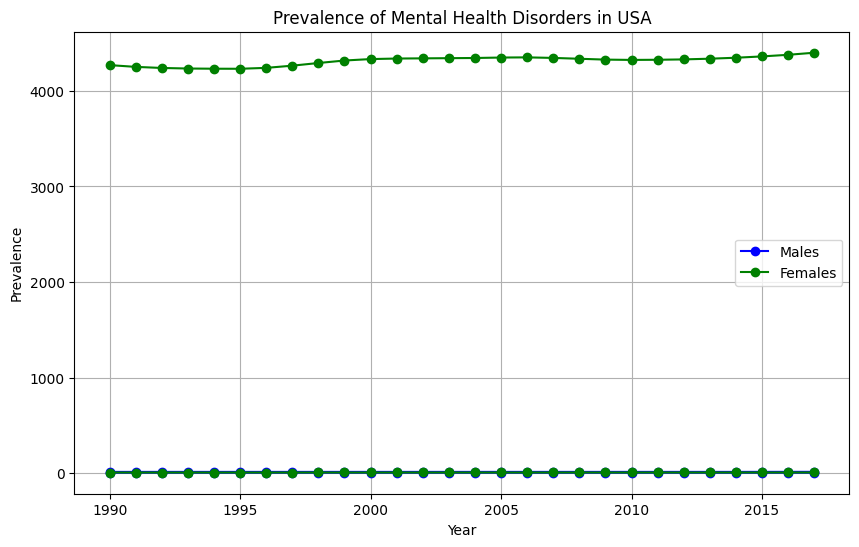

In [ ]:
# Create a time series line chart
plt.figure(figsize=(10, 6))
plt.plot(US_data['Year'], US_data['Prevalence_in_males'], label='Males', marker='o', color='blue')
plt.plot(US_data['Year'], US_data['Prevalence_in females'], label='Females', marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Prevalence')
plt.title('Prevalence of Mental Health Disorders in USA')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
!pip install dash
!pip install plotly
!pip install pandas

In [ ]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px


In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Data Visualization Dashboard"),
    dcc.Graph(
        id='chart',
        figure=px.line(df, x='Year', y='Prevalence_in_males', title='Prevalence of Mental Health Disorders in Males')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True, mode='inline')